In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
import sentencepiece
import nltk
nltk.download('stopwords')
from collections import Counter
import pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from sklearn.metrics import classification_report
from transformers import TFAlbertModel
from transformers import TFRobertaModel
from transformers import TFDistilBertModel
from transformers import AlbertTokenizer
from transformers import RobertaTokenizer
from transformers import DistilBertTokenizer
import glob
from transformers import *
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import patoolib
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings  # To ignore any warnings

warnings.filterwarnings("ignore")
import os
import glob
import numpy as np
import itertools
import pandas as pd

# Audio
import librosa
import librosa.display

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
import warnings

Using TensorFlow backend.


# Preprocessing

In [5]:
INPUT_DIR = 'D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset/**'
 
dataset = []
for filename in glob.iglob(INPUT_DIR):
    kolkuPoKlasa=0
    for f in glob.iglob(filename+'/**'):
        
        if (kolkuPoKlasa>500):
            kolkuPoKlasa=0
            break
        if os.path.exists(f):
            label = os.path.basename(filename)
            duration = librosa.get_duration(filename=f)
            print('label', f, 'duration', duration)
            # skip audio smaller than 3 secs
            if duration >= 4:
                kolkuPoKlasa+=1
                #slice_size = 3
                #iterations = int((duration - slice_size) / (slice_size - 1))
                iterations = 1
                #initial_offset = (duration - ((iterations * (slice_size - 1)) + 1)) / 2
                for i in range(iterations):
                    #offset = initial_offset + i * (slice_size - 1)
                    offset = 0
                    if (label == "finish"):
                        dataset.append({
                            "filename": f,
                            "label": "finish",
                            "offset": offset
                        })
                    elif (label == "georgian"):
                        dataset.append({
                            "filename": f,
                            "label": "georgian",
                            "offset": offset
                        })
                    elif (label == "hungary"):
                        dataset.append({
                            "filename": f,
                            "label": "hungary",
                            "offset": offset
                        })
                    elif (label == "japan"):
                        dataset.append({
                            "filename": f,
                            "label": "japan",
                            "offset": offset
                        })
                    elif (label == "ltaly"):
                        dataset.append({
                            "filename": f,
                            "label": "ltaly",
                            "offset": offset
                        })
                    elif (label == "slovenian"):
                        dataset.append({
                            "filename": f,
                            "label": "slovenian",
                            "offset": offset
                        })
                    elif (label == "swedish"):
                        dataset.append({
                            "filename": f,
                            "label": "swedish",
                            "offset": offset
                        })
                    elif (label == "thailand"):
                        dataset.append({
                            "filename": f,
                            "label": "thailand",
                            "offset": offset
                        })
                    elif (label == "greek"):
                        dataset.append({
                            "filename": f,
                            "label": "greek",
                            "offset": offset
                        })
                    else:
                        dataset.append({
                            "filename": f,
                            "label": "viatnamese",
                            "offset": offset
                        })
        
print('dlzina na dataset: ',len(dataset))
dataset = pd.DataFrame(dataset)
dataset = shuffle(dataset, random_state=42)
dataset.info()
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
x_train = []
x_test = []

for idx in range(len(train)):
    x_train.append(extract_features(train.filename.iloc[idx], train.offset.iloc[idx]))

for idx in range(len(test)):
    x_test.append(extract_features(test.filename.iloc[idx], test.offset.iloc[idx]))


label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22986631.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22986632.mp3 duration 6.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22986633.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22986634.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22986635.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22987456.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22987458.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22987459.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996256.mp3 duration 7.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996260.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996266.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996269.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996300.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996306.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996311.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996317.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996891.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996892.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996914.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996916.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996920.mp3 duration 8.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996923.mp3 duration 5.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996925.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_22996955.mp3 duration 6.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23001891.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23001893.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23001894.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23003470.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23003472.mp3 duration 6.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23003474.mp3 duration 6.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23003476.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23003478.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23018630.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23018677.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23018681.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23018682.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23018686.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23018687.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23062951.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23062953.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23091580.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23091582.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23091584.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23091587.mp3 duration 6.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23092745.mp3 duration 6.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23092748.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23092751.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23092754.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23178089.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23178090.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23178091.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23178092.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23178093.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23211616.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23211617.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23211618.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23220961.mp3 duration 6.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23220962.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23220963.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23220964.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23221048.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23221051.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23221053.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23221055.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23348059.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23348062.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23348141.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23348143.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23348145.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23348146.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23348147.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23348158.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23360914.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23360915.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23360916.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23360917.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23360918.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23360919.mp3 duration 6.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23382916.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23382917.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23391553.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23391554.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23391555.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23391561.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23391562.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23391563.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23391564.mp3 duration 5.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23391565.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23439593.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23439594.mp3 duration 6.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23618255.mp3 duration 6.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23618256.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23618257.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23618258.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23618259.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23642667.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23715957.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23715958.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23715959.mp3 duration 8.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23716218.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23716219.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23716220.mp3 duration 6.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23716221.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23716222.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23761564.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23761994.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23761995.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23761997.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23761998.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23761999.mp3 duration 8.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23762001.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23762002.mp3 duration 6.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finis

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21300955.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21300956.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21300957.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21300958.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21300979.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21300980.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21300981.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21300982.mp3 duration 7.3
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301196.mp3 duration 5.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301197.mp3 duration 7.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301203.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301204.mp3 duration 5.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301205.mp3 duration 7.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301206.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301207.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301213.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301827.mp3 duration 7.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301853.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301854.mp3 duration 6.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301855.mp3 duration 6.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301856.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301857.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301893.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301894.mp3 duration 10.0
label D:/studies7/Natural_Language_processing/MAIN_PROJ

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21303808.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21303809.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21303810.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21303811.mp3 duration 7.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21303812.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21304389.mp3 duration 6.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21313024.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21313025.mp3 duration 8.3
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21319262.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21319275.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21319276.mp3 duration 5.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21319277.mp3 duration 6.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21319278.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21319279.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21319315.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21319316.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356147.mp3 duration 7.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356151.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356152.mp3 duration 8.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356153.mp3 duration 7.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356154.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356155.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356156.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356157.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356286.mp3 duration 7.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356287.mp3 duration 6.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356288.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356289.mp3 duration 5.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356290.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356306.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356307.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356308.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356857.mp3 duration 6.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356866.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356867.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356868.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356869.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356870.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356912.mp3 duration 9.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21356913.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21358309.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21358310.mp3 duration 7.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21358311.mp3 duration 9.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21358313.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21358329.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21358330.mp3 duration 6.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21358331.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21358332.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429484.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429485.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429486.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429493.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429494.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429495.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429496.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429497.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429702.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429703.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429704.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429706.mp3 duration 6.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429709.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429711.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429714.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429715.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429885.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429886.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429887.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429969.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429970.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429971.mp3 duration 5.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429972.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429973.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20430391.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20430392.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20430393.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20430394.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20430395.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20430396.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20430397.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20430398.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20432958.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20432959.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20432960.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20432961.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20432962.mp3 duration 6.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20432963.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20432964.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20432965.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433056.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433057.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433058.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433059.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433060.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433061.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433062.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433063.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433183.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433184.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433185.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433186.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433187.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433188.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433189.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433190.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437053.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437054.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437055.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437056.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437057.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437058.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437059.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437060.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437150.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437151.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437152.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437153.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437154.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437155.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437156.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20437157.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20443468.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20443469.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20443470.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20443471.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20443472.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20443478.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20443479.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20443480.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20446426.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20446427.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20446428.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20446429.mp3 duration 5.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20446430.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20446431.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20446432.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20446433.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20454043.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20454044.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20454045.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20454046.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20454047.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20454053.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20454054.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20454055.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20458890.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20458891.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20458892.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20458893.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20458894.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20458895.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20458896.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20458897.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20471475.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20471481.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20471482.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20471483.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20471484.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20471485.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20471496.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20471497.mp3 duration 6.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20480896.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20480897.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20480898.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20480909.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20480910.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20480911.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20480912.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20480913.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20488942.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20488943.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20488944.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20488945.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20488946.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20488947.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20488948.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20488949.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23080001.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23080080.mp3 duration 6.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23080083.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23080086.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23080088.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23080089.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23080127.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23080128.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23114710.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23114711.mp3 duration 6.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23114712.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23114713.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23114714.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23114721.mp3 duration 6.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23114722.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23114723.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23136656.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23136657.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23136658.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23136659.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23136665.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23136666.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23136667.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23136668.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23201365.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23201367.mp3 duration 6.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23201371.mp3 duration 6.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23234103.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23234107.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23234108.mp3 duration 7.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23234109.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23234111.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23235443.mp3 duration 5.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23235919.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23235921.mp3 duration 6.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23235922.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23235923.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23235924.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23235930.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23235931.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23309129.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23309297.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23309298.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23309299.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23309300.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23309301.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23309344.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23309345.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23340868.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23340869.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23340871.mp3 duration 7.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23340872.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23340874.mp3 duration 6.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23340879.mp3 duration 7.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23340880.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23340881.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23345557.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23345558.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23345559.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23345560.mp3 duration 7.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23345561.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23345562.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23345563.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23345565.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356346.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356347.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356353.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356354.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356355.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356356.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356357.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356368.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356541.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356547.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356548.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356549.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356550.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356551.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356557.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356558.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356733.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356734.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356735.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356736.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356747.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356748.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356749.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23356750.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387656.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387657.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387658.mp3 duration 7.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387669.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387670.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387671.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387672.mp3 duration 6.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387673.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387788.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387794.mp3 duration 6.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387795.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387796.mp3 duration 6.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387797.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387798.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387803.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387805.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387905.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387906.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387907.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387908.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387909.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387910.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387911.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23387912.mp3 duration 5.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23390413.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23390414.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23390415.mp3 duration 7.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23390416.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23390417.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23390418.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23390419.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23390420.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23405172.mp3 duration 6.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23405173.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23405174.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23405175.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23405176.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23410305.mp3 duration 7.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23410306.mp3 duration 7.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23410307.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/datas

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19485654.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19485655.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19485869.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19485872.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19485873.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19485876.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19485884.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19485887.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19507544.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19507545.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19517025.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19517026.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19523283.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19523285.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19529145.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19529147.mp3 duration 7.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19621168.mp3 duration 9.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19621169.mp3 duration 5.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19673792.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19676248.mp3 duration 8.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19677955.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19677957.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19682065.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19682143.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19763931.mp3 duration 6.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19763934.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19763995.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19763998.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19763999.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19779200.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19779204.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19779207.mp3 duration 5.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19779868.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19779892.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19779893.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19779899.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19779908.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19779933.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19779938.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19779945.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19865564.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19865584.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19865585.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19865587.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19875369.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19875372.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19879415.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19879417.mp3 duration 6.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20048516.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20048518.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20048539.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20048555.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20048558.mp3 duration 7.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20048559.mp3 duration 9.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20054475.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20054477.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20073258.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20073261.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20073267.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20073271.mp3 duration 6.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20073363.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20073375.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20073379.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20073382.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074008.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074009.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074024.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074027.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074029.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074047.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074048.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074049.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074653.mp3 duration 6.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074655.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074662.mp3 duration 8.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074664.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074678.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074689.mp3 duration 5.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074690.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20074708.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20101952.mp3 duration 7.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20101953.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20101974.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20101976.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20101977.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20101982.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20101984.mp3 duration 8.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_20101985.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705622.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705623.mp3 duration 5.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705644.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705645.mp3 duration 6.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705646.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705647.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705648.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705659.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705833.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705841.mp3 duration 6.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705843.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705854.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705856.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705859.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705860.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23705861.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706076.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706077.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706080.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706081.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706082.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706083.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706084.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706091.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706297.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706298.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706299.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706300.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706301.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706308.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706309.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23706310.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23708480.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23708481.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23708492.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23708493.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23708494.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23708495.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23708496.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23708502.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23709232.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23709233.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23709234.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23709235.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23709236.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23709889.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23709890.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23709891.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23714776.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23714777.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23714788.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23714789.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23714790.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23714791.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23714792.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23715683.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717209.mp3 duration 8.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717210.mp3 duration 7.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717211.mp3 duration 8.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717212.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717213.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717229.mp3 duration 5.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717230.mp3 duration 8.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717231.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717323.mp3 duration 7.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717324.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717325.mp3 duration 6.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717326.mp3 duration 5.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717327.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717328.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717329.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717330.mp3 duration 6.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717435.mp3 duration 6.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717436.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717437.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717438.mp3 duration 6.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717439.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717442.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717445.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717447.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717512.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717513.mp3 duration 6.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717514.mp3 duration 6.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717515.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717516.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717517.mp3 duration 8.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717518.mp3 duration 7.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717670.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717772.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17368788.mp3 duration 8.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17368789.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17368790.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17368791.mp3 duration 1.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17368792.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17368793.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17368794.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_P

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17383597.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17383603.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17383604.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17383605.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17383606.mp3 duration 1.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17383607.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17396175.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17396176.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17399437.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17399438.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17399470.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17399471.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17399472.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17399473.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17399474.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17399475.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419640.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419641.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419647.mp3 duration 5.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419648.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419649.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419650.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419651.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419652.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419749.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419750.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419751.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419752.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419753.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419754.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419755.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419756.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17435121.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17435122.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17435123.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17435124.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17436823.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17436824.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17436825.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17436826.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568209.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568210.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568211.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568212.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568213.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568219.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568220.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568221.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568302.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568303.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568304.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568305.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568306.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568307.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568308.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568309.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568377.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568378.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568379.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568380.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568381.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568382.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568383.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568384.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568451.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568452.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568453.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568454.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568455.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568456.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568457.mp3 duration 1.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568458.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568522.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568523.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568524.mp3 duration 5.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568525.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568526.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568527.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568528.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568529.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568597.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568598.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568599.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568600.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568601.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568605.mp3 duration 7.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568606.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568607.mp3 duration 6.9
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568688.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568689.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568690.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568691.mp3 duration 5.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568692.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568693.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568694.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568695.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568803.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568804.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568805.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568806.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568807.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568808.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568819.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568820.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568912.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568913.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568914.mp3 duration 1.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568915.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568916.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568917.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568918.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568919.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569002.mp3 duration 1.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569003.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569009.mp3 duration 1.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569010.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569011.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569012.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569013.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569015.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569094.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569095.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569096.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569097.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569098.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569099.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569100.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569101.mp3 duration 1.8
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569171.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569172.mp3 duration 6.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569173.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569174.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569175.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569177.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569178.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569179.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17765408.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17765409.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17765410.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17765416.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17765417.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17765418.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17765419.mp3 duration 5.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17765420.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17799061.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17799062.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17799063.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17799064.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17799080.mp3 duration 6.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17799081.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17799082.mp3 duration 7.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17799083.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17823893.mp3 duration 1.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17823894.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17823895.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17823896.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17823897.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17823898.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17823899.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17823900.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17855967.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17855968.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17855969.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17855970.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17855971.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17855972.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17855973.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17855974.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MA

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18710590.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18710591.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18711293.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18711294.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18711295.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18711296.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18711297.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18711303.mp3 duration 5.7
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18712253.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18712254.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18712255.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18712260.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18712261.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18712262.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18712263.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18712264.mp3 duration 2.8
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715492.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715493.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715494.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715495.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715496.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715497.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715498.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715499.mp3 duration 3.0
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715901.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715902.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715903.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715904.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715905.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715906.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715907.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18715908.mp3 duration 4.0
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18732926.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18733513.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18733514.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18733515.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18733516.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18733517.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18736931.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18736932.mp3 duration 3.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741448.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741449.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741450.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741451.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741452.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741453.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741464.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741465.mp3 duration 2.7
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741557.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741558.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741559.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741560.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741561.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741562.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741563.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741564.mp3 duration 3.5
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741676.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741677.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741678.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741679.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741680.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741681.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741682.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741683.mp3 duration 3.6
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741812.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741813.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741816.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741817.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741818.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741819.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741820.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741821.mp3 duration 2.8
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741899.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741900.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741901.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741902.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741903.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741904.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741905.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18741906.mp3 duration 2.7
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742005.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742006.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742007.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742008.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742009.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742010.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742011.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742012.mp3 duration 2.3
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742114.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742115.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742116.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742117.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742118.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742119.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742120.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742121.mp3 duration 1.9
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742212.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742213.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742214.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742217.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742218.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742219.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742220.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742221.mp3 duration 2.6
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742293.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742294.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742295.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742296.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742297.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742298.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742299.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742300.mp3 duration 2.3
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742377.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742378.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742379.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742380.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742381.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742382.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742383.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742384.mp3 duration 2.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742446.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742447.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742448.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742449.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742450.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742451.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742452.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742453.mp3 duration 2.6
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742568.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742569.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742570.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742571.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742577.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742578.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742579.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18742580.mp3 duration 2.5
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18743591.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18743592.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18743593.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18743594.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18743605.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18743606.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18743607.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18743608.mp3 duration 2.2
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18745652.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18745655.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18745657.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18745659.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18745683.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18745686.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18745688.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18745689.mp3 duration 2.8
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18746552.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18746553.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18746554.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18746555.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18746561.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18746562.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18746563.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18746564.mp3 duration 2.7
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748337.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748338.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748339.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748340.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748341.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748360.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748362.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748363.mp3 duration 2.5
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748493.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748495.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748498.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748499.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748501.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748502.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748503.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748504.mp3 duration 2.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748722.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748723.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748724.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748725.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748726.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748732.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748733.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18748734.mp3 duration 2.6
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18761713.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18761714.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18761715.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18761716.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18761717.mp3 duration 1.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18761718.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18761719.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18761720.mp3 duration 4.5
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762169.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762170.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762171.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762172.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762173.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762174.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762175.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762176.mp3 duration 2.9
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762258.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762259.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762260.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762261.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762262.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762263.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762264.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762270.mp3 duration 4.0
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762352.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762353.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762354.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762355.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762356.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762357.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762358.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18762359.mp3 duration 1.9
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18763663.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18763664.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18770421.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18770422.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18770423.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18770424.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18770425.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18770426.mp3 duration 2.6
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774270.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774271.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774272.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774273.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774274.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774275.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774276.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774277.mp3 duration 2.7
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774393.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774394.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774396.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774397.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774398.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774399.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774400.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18774401.mp3 duration 3.3
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18775017.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18775018.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18775019.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18775020.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18775021.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18775022.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18775023.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18775024.mp3 duration 1.9
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18780636.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18780638.mp3 duration 6.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18780640.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18780641.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18780642.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18780643.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18780647.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18780648.mp3 duration 6.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18786724.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18786725.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18786737.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18786738.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18786740.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18786741.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18786742.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18786752.mp3 duration 3.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18831476.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18831477.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18831478.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18831484.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18831485.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18831486.mp3 duration 1.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18831487.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18831488.mp3 duration 4.9
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18843411.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18843412.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18843413.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18843414.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18843417.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18843419.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18843420.mp3 duration 1.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18843421.mp3 duration 2.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844807.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844808.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844809.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844810.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844811.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844812.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844813.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844814.mp3 duration 2.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844877.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844878.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844879.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844880.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844881.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844882.mp3 duration 1.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844883.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844884.mp3 duration 1.9
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844947.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844948.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844949.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844950.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844951.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844952.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844953.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18844954.mp3 duration 2.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845016.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845017.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845018.mp3 duration 1.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845019.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845020.mp3 duration 1.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845021.mp3 duration 1.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845022.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845023.mp3 duration 2.9
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845087.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845088.mp3 duration 1.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845089.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845090.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845091.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845092.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845093.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845094.mp3 duration 1.8
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845156.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845157.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845158.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845159.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845160.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845161.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845162.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845163.mp3 duration 2.6
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845260.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845261.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845262.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845263.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845264.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845265.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845266.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845267.mp3 duration 1.6
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845329.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845330.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845331.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845333.mp3 duration 1.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845334.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845335.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845336.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845337.mp3 duration 1.7
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18845484.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18846204.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18846205.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18846206.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18846207.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18846208.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18847607.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18847608.mp3 duration 3.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18847716.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18847837.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18847838.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18847839.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18847840.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18847841.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18847842.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18847843.mp3 duration 3.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18848937.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18850260.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18850261.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18850262.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18850263.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18850264.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18850825.mp3 duration 6.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18850826.mp3 duration 5.4
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18851204.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18851205.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18851207.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18851208.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18851210.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18851219.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18851220.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18851221.mp3 duration 5.6
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18851448.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852635.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852636.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852637.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852638.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852639.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852740.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852741.mp3 duration 3.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852918.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852919.mp3 duration 1.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852925.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852926.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852927.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852928.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852929.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18852930.mp3 duration 4.6
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18853578.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18853579.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18853580.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18853581.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18853582.mp3 duration 5.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18853583.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18853584.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18853585.mp3 duration 6.2
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855786.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855787.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855788.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855789.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855790.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855791.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855792.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855793.mp3 duration 3.3
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855972.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855973.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855974.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855975.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855981.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855982.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855983.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18855984.mp3 duration 2.5
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18856057.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18856058.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18856059.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18856060.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18856061.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18856062.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18856063.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18856064.mp3 duration 2.6
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858233.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858235.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858236.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858237.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858238.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858672.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858673.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858674.mp3 duration 3.3
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858756.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858757.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858758.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858759.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858760.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858761.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858762.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858763.mp3 duration 3.0
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858826.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858827.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858828.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858829.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858830.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858831.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858832.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18858833.mp3 duration 5.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860656.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860662.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860663.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860664.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860665.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860666.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860667.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860668.mp3 duration 3.7
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860741.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860742.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860743.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860744.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860745.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860746.mp3 duration 1.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860747.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860748.mp3 duration 2.7
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646663.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646664.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646665.mp3 duration 1.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646666.mp3 duration 2.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646667.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646668.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646669.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646670.mp3 duration 2.4
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646848.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646849.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646850.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646851.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646852.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646853.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646854.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23646855.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650530.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650531.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650532.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650533.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650534.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650535.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650536.mp3 duration 7.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650537.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650605.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650606.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650607.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650608.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650609.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650610.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650611.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650612.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650773.mp3 duration 2.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650774.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650775.mp3 duration 5.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650776.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650777.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650782.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650784.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23650785.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654284.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654309.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654310.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654311.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654312.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654313.mp3 duration 6.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654341.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654342.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654649.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654650.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654651.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654652.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654653.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654654.mp3 duration 6.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654655.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654656.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654855.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654856.mp3 duration 6.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654857.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654858.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654859.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654860.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654861.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654862.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654945.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654946.mp3 duration 6.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654947.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654948.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654949.mp3 duration 6.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654950.mp3 duration 7.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654951.mp3 duration 6.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23654952.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655033.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655034.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655035.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655036.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655037.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655038.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655039.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655040.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655103.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655104.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655105.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655106.mp3 duration 2.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655107.mp3 duration 6.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655108.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655109.mp3 duration 5.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655110.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655482.mp3 duration 7.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655483.mp3 duration 8.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655494.mp3 duration 8.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655495.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655496.mp3 duration 6.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655497.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655498.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655509.mp3 duration 9.8
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655597.mp3 duration 5.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655598.mp3 duration 6.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655599.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655600.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655601.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655602.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655603.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655614.mp3 duration 8.9
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655692.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655693.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655694.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655695.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655696.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655697.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655698.mp3 duration 6.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655699.mp3 duration 5.2
label D:/studies7/Natural_Language_processing/MAIN_PROJE

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_21833253.mp3 duration 6.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_21833254.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_21833255.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_21833259.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_21833262.mp3 duration 7.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_21833263.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_21833264.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_21833265.mp3 duration 5.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22028288.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22028458.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22028463.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22028467.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22028472.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22028481.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22028578.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22028584.mp3 duration 2.5
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22402463.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22402464.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22402465.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22402501.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22402502.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22402503.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22402504.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22402506.mp3 duration 3.5
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22714900.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22714903.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22714904.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22714906.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22714907.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22714933.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22714939.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22714940.mp3 duration 2.6
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23078614.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23078615.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23078658.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23078662.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23078663.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23078665.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23078668.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23078713.mp3 duration 3.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23338568.mp3 duration 3.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23338570.mp3 duration 2.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23338586.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23338587.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23338588.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23338589.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23338590.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23357922.mp3 duration 3.6
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23406207.mp3 duration 3.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23406208.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23406209.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23406210.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23406211.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23406212.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23406213.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23406214.mp3 duration 3.5
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23676735.mp3 duration 4.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23676736.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23676737.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23676738.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23689546.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23689547.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23689548.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23689549.mp3 duration 4.9
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23753775.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23753776.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23753782.mp3 duration 2.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23753783.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23753784.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23753785.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23753786.mp3 duration 3.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23755973.mp3 duration 2.5
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23848849.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23848850.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23848851.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23848852.mp3 duration 2.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23848853.mp3 duration 4.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23848854.mp3 duration 4.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23848855.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23848856.mp3 duration 2.8
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23901119.mp3 duration 7.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23901120.mp3 duration 4.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23901121.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23901282.mp3 duration 3.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23901283.mp3 duration 6.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23901285.mp3 duration 5.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23901286.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23901288.mp3 duration 4.8
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925072.mp3 duration 4.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925073.mp3 duration 4.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925074.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925075.mp3 duration 7.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925076.mp3 duration 2.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925077.mp3 duration 3.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925078.mp3 duration 5.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925079.mp3 duration 3.1
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925146.mp3 duration 6.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925147.mp3 duration 3.9
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925148.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925149.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925155.mp3 duration 3.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925156.mp3 duration 5.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925157.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23925158.mp3 duration 3.5
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926752.mp3 duration 2.6
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926753.mp3 duration 8.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926754.mp3 duration 5.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926755.mp3 duration 3.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926756.mp3 duration 5.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926757.mp3 duration 5.3
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926758.mp3 duration 3.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926759.mp3 duration 3.9
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926832.mp3 duration 3.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926833.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926839.mp3 duration 2.7
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926840.mp3 duration 4.2
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926841.mp3 duration 4.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926842.mp3 duration 7.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926843.mp3 duration 5.8
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23926844.mp3 duration 3.2
label D:/studies7/Natural_Language_proce

label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23930574.mp3 duration 4.1
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23930575.mp3 duration 4.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23930576.mp3 duration 6.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23930577.mp3 duration 6.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23930578.mp3 duration 5.0
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23930579.mp3 duration 7.5
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23930580.mp3 duration 6.4
label D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23930581.mp3 duration 5.3
dlzina na dataset:  5010
<class 'pandas.

In [6]:
x_test = np.asarray(x_test)
x_train = np.asarray(x_train)

encoder = LabelEncoder()
encoder.fit(train.label)

y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)

    # Compute class weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
    #test
class_weights = {i: class_weights[i] for i in range(len(class_weights))}
    #test
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("X train:", x_train.shape)
print("Y train:", y_train.shape)
print("X test:", x_test.shape)
print("Y test:", y_test.shape)
print(class_weights)

X train: (4008, 40, 173, 1)
Y train: (4008, 10)
X test: (1002, 40, 173, 1)
Y test: (1002, 10)
{0: 1.038341968911917, 1: 1.0146835443037974, 2: 1.035658914728682, 3: 0.9823529411764705, 4: 0.9896296296296296, 5: 1.0095717884130981, 6: 0.9520190023752969, 7: 1.0045112781954888, 8: 1.0045112781954888, 9: 0.9751824817518249}


In [4]:
#Extract MFCC from spectogram
def extract_features(audio_path, offset):
    y, sr = librosa.load(audio_path, offset=offset, duration=4.0)

    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048,
                                       hop_length=512,
                                       n_mels=128)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)

    return mfccs




In [7]:
print(len(dataset),' pred')
# naoganje i brishenje na prazni samples
nuli = []
for i in range(0,len(dataset)):
  y,sr = librosa.load(dataset.filename.iloc[i], duration=4)
  if y.any() == 0:
    nuli.append(i)
print(nuli)


5010  pred
[523, 680, 1474, 1568, 1951, 2863, 2926, 3588, 4011, 4320]


In [8]:
dataset = dataset.drop(index=nuli)
print('po izbrisheni dolzijna',len(dataset))

po izbrisheni dolzijna 5000


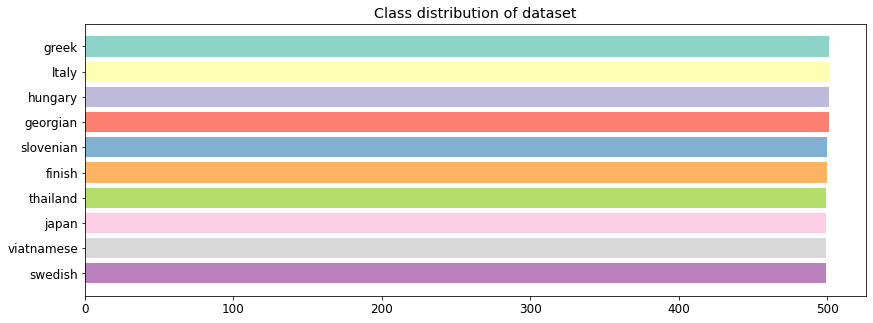

In [9]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 5)
matplotlib.rcParams['font.size'] = 12
from matplotlib import pyplot as plt

num_classes = 10
class_counts = dataset.label.value_counts()
cmap = plt.cm.get_cmap(plt.cm.Set3, 10)
colors = [cmap(i) for i in range(num_classes)]
plt.barh(range(num_classes)[::-1], class_counts, tick_label=dataset.label.unique(),
         color=colors)
plt.title('Class distribution of dataset')
plt.show()

D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20433010.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltaly\common_voice_lt_23717341.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungary\common_voice_hu_23235982.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21301295.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17569181.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23212126.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thailand\common_voice_th_23655008.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japan\common_voice_ja_19534044.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23406206.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18860710.mp3


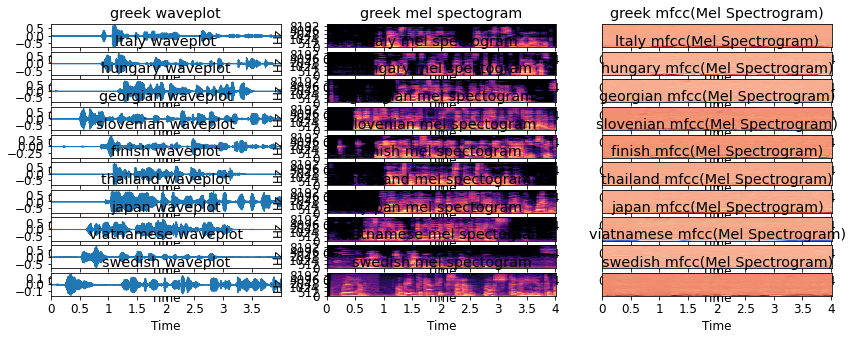

In [11]:
idx = 0
for label in dataset.label.unique():    
    y, sr = librosa.load(dataset[dataset.label==label].filename.iloc[3], duration=4)
    print(dataset[dataset.label==label].filename.iloc[3])
    
    # Wave plot
    idx+=1
    
    plt.subplot(10, 3, idx)
    plt.title("%s waveplot" % label)
    librosa.display.waveplot(y, sr=sr)

    # Mel Spectrogram
    idx+=1
    plt.subplot(10, 3, idx)
    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
    plt.title("%s mel spectogram" % label)

    # MFCC (Mel spectrogram)
    idx+=1
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    plt.subplot(10, 3, idx)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title("%s mfcc(Mel Spectrogram)" % label)
plt.show()

In [12]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(len(encoder.classes_), activation='softmax'))
model.summary()

adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 172, 16)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 86, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 41, 64)        

In [13]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=333,
                    validation_data=(x_test, y_test),
                    class_weight=class_weights,
                    shuffle=True)


model_name = "language_classifier.h5"
model.save(model_name)

Train on 4008 samples, validate on 1002 samples
Epoch 1/333
4008/4008 [==============================] - 20s 5ms/step - loss: 7.5180 - accuracy: 0.1163 - val_loss: 2.2221 - val_accuracy: 0.1088
Epoch 2/333
4008/4008 [==============================] - 16s 4ms/step - loss: 2.4631 - accuracy: 0.1564 - val_loss: 2.1380 - val_accuracy: 0.1906
Epoch 3/333
4008/4008 [==============================] - 17s 4ms/step - loss: 2.1596 - accuracy: 0.2106 - val_loss: 2.0560 - val_accuracy: 0.2904
Epoch 4/333
4008/4008 [==============================] - 16s 4ms/step - loss: 2.0269 - accuracy: 0.2582 - val_loss: 1.9943 - val_accuracy: 0.3194
Epoch 5/333
4008/4008 [==============================] - 17s 4ms/step - loss: 1.9300 - accuracy: 0.3171 - val_loss: 1.8801 - val_accuracy: 0.3922
Epoch 6/333
4008/4008 [==============================] - 16s 4ms/step - loss: 1.8336 - accuracy: 0.3510 - val_loss: 1.8091 - val_accuracy: 0.4072
Epoch 7/333
4008/4008 [==============================] - 16s 4ms/step - loss

4008/4008 [==============================] - 16s 4ms/step - loss: 0.6972 - accuracy: 0.7782 - val_loss: 0.6587 - val_accuracy: 0.8094
Epoch 57/333
4008/4008 [==============================] - 16s 4ms/step - loss: 0.6902 - accuracy: 0.7740 - val_loss: 0.6498 - val_accuracy: 0.8084
Epoch 58/333
4008/4008 [==============================] - 16s 4ms/step - loss: 0.6843 - accuracy: 0.7809 - val_loss: 0.6710 - val_accuracy: 0.8104
Epoch 59/333
4008/4008 [==============================] - 16s 4ms/step - loss: 0.6729 - accuracy: 0.7802 - val_loss: 0.6213 - val_accuracy: 0.8164
Epoch 60/333
4008/4008 [==============================] - 16s 4ms/step - loss: 0.6476 - accuracy: 0.7872 - val_loss: 0.5911 - val_accuracy: 0.8303
Epoch 61/333
4008/4008 [==============================] - 17s 4ms/step - loss: 0.6402 - accuracy: 0.7912 - val_loss: 0.6020 - val_accuracy: 0.8263
Epoch 62/333
4008/4008 [==============================] - 17s 4ms/step - loss: 0.6238 - accuracy: 0.7977 - val_loss: 0.6286 - val_a

Epoch 112/333
4008/4008 [==============================] - 17s 4ms/step - loss: 0.3874 - accuracy: 0.8683 - val_loss: 0.4028 - val_accuracy: 0.8872
Epoch 113/333
4008/4008 [==============================] - 17s 4ms/step - loss: 0.3785 - accuracy: 0.8772 - val_loss: 0.4142 - val_accuracy: 0.8822
Epoch 114/333
4008/4008 [==============================] - 17s 4ms/step - loss: 0.3764 - accuracy: 0.8767 - val_loss: 0.3993 - val_accuracy: 0.8782
Epoch 115/333
4008/4008 [==============================] - 17s 4ms/step - loss: 0.3780 - accuracy: 0.8735 - val_loss: 0.4297 - val_accuracy: 0.8802
Epoch 116/333
4008/4008 [==============================] - 18s 4ms/step - loss: 0.3645 - accuracy: 0.8825 - val_loss: 0.4171 - val_accuracy: 0.8762
Epoch 117/333
4008/4008 [==============================] - 18s 4ms/step - loss: 0.3797 - accuracy: 0.8693 - val_loss: 0.4037 - val_accuracy: 0.8743
Epoch 118/333
4008/4008 [==============================] - 18s 5ms/step - loss: 0.3643 - accuracy: 0.8805 - val_

4008/4008 [==============================] - 16s 4ms/step - loss: 0.2654 - accuracy: 0.9109 - val_loss: 0.3555 - val_accuracy: 0.9032
Epoch 168/333
4008/4008 [==============================] - 15s 4ms/step - loss: 0.2586 - accuracy: 0.9067 - val_loss: 0.3709 - val_accuracy: 0.8892
Epoch 169/333
4008/4008 [==============================] - 16s 4ms/step - loss: 0.2489 - accuracy: 0.9149 - val_loss: 0.3436 - val_accuracy: 0.8972
Epoch 170/333
4008/4008 [==============================] - 21s 5ms/step - loss: 0.2411 - accuracy: 0.9202 - val_loss: 0.3620 - val_accuracy: 0.9012
Epoch 171/333
4008/4008 [==============================] - 20s 5ms/step - loss: 0.2314 - accuracy: 0.9199 - val_loss: 0.3500 - val_accuracy: 0.9082
Epoch 172/333
4008/4008 [==============================] - 21s 5ms/step - loss: 0.2513 - accuracy: 0.9164 - val_loss: 0.3845 - val_accuracy: 0.8932
Epoch 173/333
4008/4008 [==============================] - 21s 5ms/step - loss: 0.2500 - accuracy: 0.9129 - val_loss: 0.3714 -

4008/4008 [==============================] - 25s 6ms/step - loss: 0.1823 - accuracy: 0.9386 - val_loss: 0.3175 - val_accuracy: 0.9152
Epoch 223/333
4008/4008 [==============================] - 20s 5ms/step - loss: 0.1742 - accuracy: 0.9371 - val_loss: 0.3292 - val_accuracy: 0.9072
Epoch 224/333
4008/4008 [==============================] - 21s 5ms/step - loss: 0.1834 - accuracy: 0.9379 - val_loss: 0.3659 - val_accuracy: 0.9002
Epoch 225/333
4008/4008 [==============================] - 17s 4ms/step - loss: 0.1847 - accuracy: 0.9359 - val_loss: 0.3347 - val_accuracy: 0.9142
Epoch 226/333
4008/4008 [==============================] - 17s 4ms/step - loss: 0.1745 - accuracy: 0.9416 - val_loss: 0.3297 - val_accuracy: 0.9092
Epoch 227/333
4008/4008 [==============================] - 19s 5ms/step - loss: 0.1660 - accuracy: 0.9459 - val_loss: 0.3300 - val_accuracy: 0.9092
Epoch 228/333
4008/4008 [==============================] - 18s 4ms/step - loss: 0.1737 - accuracy: 0.9426 - val_loss: 0.3283 -

4008/4008 [==============================] - 16s 4ms/step - loss: 0.1351 - accuracy: 0.9518 - val_loss: 0.3291 - val_accuracy: 0.9122
Epoch 278/333
4008/4008 [==============================] - 17s 4ms/step - loss: 0.1430 - accuracy: 0.9503 - val_loss: 0.3313 - val_accuracy: 0.9152
Epoch 279/333
4008/4008 [==============================] - 21s 5ms/step - loss: 0.1486 - accuracy: 0.9469 - val_loss: 0.3245 - val_accuracy: 0.9092
Epoch 280/333
4008/4008 [==============================] - 18s 5ms/step - loss: 0.1463 - accuracy: 0.9501 - val_loss: 0.3509 - val_accuracy: 0.9072
Epoch 281/333
4008/4008 [==============================] - 18s 4ms/step - loss: 0.1313 - accuracy: 0.9543 - val_loss: 0.3397 - val_accuracy: 0.9082
Epoch 282/333
4008/4008 [==============================] - 19s 5ms/step - loss: 0.1447 - accuracy: 0.9494 - val_loss: 0.3492 - val_accuracy: 0.9092
Epoch 283/333
4008/4008 [==============================] - 22s 6ms/step - loss: 0.1221 - accuracy: 0.9578 - val_loss: 0.3457 -

4008/4008 [==============================] - 21s 5ms/step - loss: 0.1242 - accuracy: 0.9588 - val_loss: 0.3071 - val_accuracy: 0.9202
Epoch 333/333
4008/4008 [==============================] - 19s 5ms/step - loss: 0.1325 - accuracy: 0.9536 - val_loss: 0.3276 - val_accuracy: 0.9082


In [14]:
predictions = model.predict(x_test, verbose=1)

y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions): 
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
    
print(classification_report(y_pred, y_true))

1002/1002 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

      finish       0.96      0.92      0.94       119
    georgian       0.97      0.82      0.89       125
       greek       0.99      0.95      0.97       119
     hungary       0.89      0.87      0.88        95
       japan       0.81      0.93      0.87        84
       ltaly       0.92      0.99      0.96        97
   slovenian       0.99      0.92      0.95        86
     swedish       0.88      0.89      0.89       101
    thailand       0.82      0.91      0.87        92
  viatnamese       0.82      0.88      0.85        84

    accuracy                           0.91      1002
   macro avg       0.91      0.91      0.91      1002
weighted avg       0.91      0.91      0.91      1002

